# Ecological Footprint

How many Earth's does it take to support that country

In [1]:
from ggplot import *
from matplotlib import pyplot as graph
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import shapiro, mannwhitneyu, ks_2samp, probplot
from IPython.display import display, Markdown

sns.set(font_scale=1.2)
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('data/ecological.footprints.csv')
display(data.head())

,country,ecological.footprint,yr
0,United Arab Emirates,15.99,2000
1,United States,12.22,2000
2,Kuwait,10.31,2000
3,Denmark,9.88,2000
4,New Zealand,9.54,2000


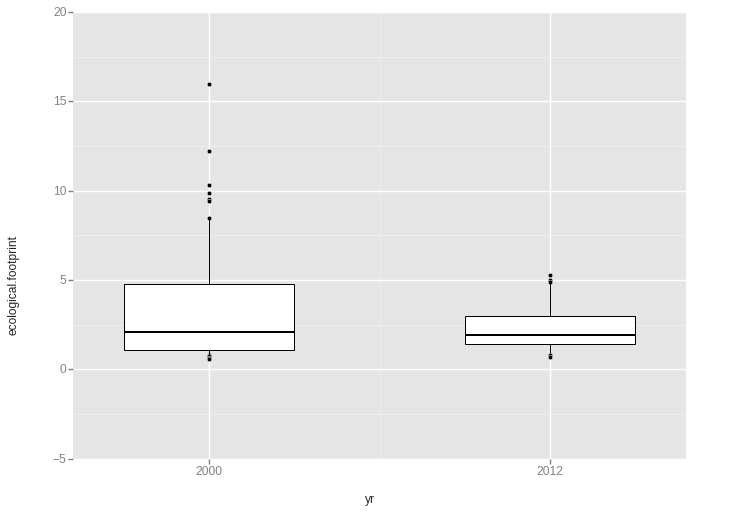

<ggplot: (8732679334348)>

In [3]:
ggplot(aes('yr', 'ecological.footprint'), data=data) + geom_boxplot()

# Unpaired Tests

2 groups are begging for a t-Test and the possibility of a paired one will be done later but first we need to check for normality. 

Why? This is the kind of thing that you'd expect to have a Zipfen or Beta distribution, which would violate the assumption of the t-test.

I'm going to use the _Sharpiro-Wilk Test_ to check for normality just because it's my favorite. (I could also do an Anderson-Darling test if you think the Sharpiro test is too strict).

### Year 2000

N: 141
Sharpiro: 0.8140201568603516 p-value: 4.30761676328828e-12
REJECT: Not Normal


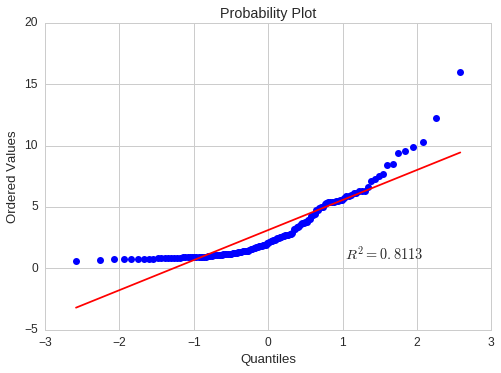

### Year 2012

N: 50
Sharpiro: 0.8822188973426819 p-value: 0.00013074514572508633
REJECT: Not Normal


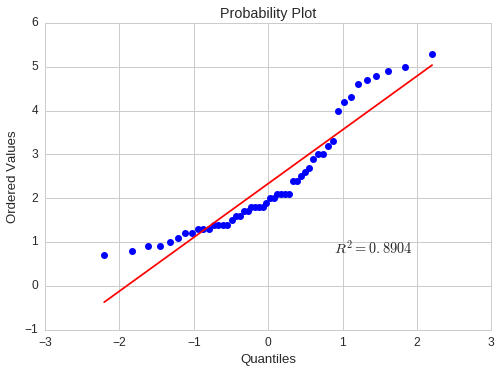

In [4]:
for year in data.yr.unique():
    display(Markdown('### Year {}'.format(year)))
    
    print('N:', len(data[data.yr == year]))
    
    sw = shapiro(data[data.yr == year]['ecological.footprint'])
    print('Sharpiro:', sw[0], 'p-value:', sw[1])
    
    if sw[1] < 0.05:
        print('REJECT: Not Normal')
        
    probplot(data[data.yr == year]['ecological.footprint'], plot=graph)
    graph.show()
        
    print('')    

Since they are not normally distributed I could try to transform them to make them so or just use an non-parametric test. I'm feelign lazy so I'm going to do the latter.

I'm going to use the _Mann-Whittney U Test_. While it's weaker than the t-Test I don't think from looking at the data it will be an issue here. The only really assumption of the U test is that you cannot use small sample sizes, which is not an issue here.

In [5]:
# Running Mann-Whittney U Test!
u = mannwhitneyu(data[data.yr == 2000]['ecological.footprint'], data[data.yr == 2012]['ecological.footprint'])
print('Mann Whitney U =', u.statistic, 'p-value =', u.pvalue)

Mann Whitney U = 3672.5 p-value = 0.66159647186


# Paired Tests

Hmmmm I doubt these groups are not different... I'm positive running a paired test will show the result we seem to see from the graph!

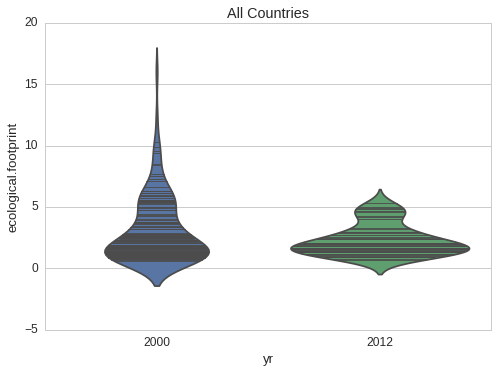

In [6]:
# Let's look at our data one more time... WITH KDE!!!
sns.violinplot(x='yr', y='ecological.footprint', data=data, inner='stick')
graph.title('All Countries')
graph.show()

In [7]:
# Let's make sure the countries have buddies in the future now
paired = data.pivot(index='country', columns='yr', values='ecological.footprint')

assert len(data.country.unique()) == len(paired)

print('All')
display(paired.head())

print('Unpaired Countries Removed')
paired.dropna(inplace=True)
display(paired.head())

All


yr,2000,2012
country,,
Albania,1.86,1.8
Algeria,1.79,1.6
Angola,0.82,NaN
Argentina,3.79,2.7
Armenia,1.16,NaN


Unpaired Countries Removed


yr,2000,2012
country,,
Albania,1.86,1.8
Algeria,1.79,1.6
Argentina,3.79,2.7
Austria,5.45,5.3
Bangladesh,0.60,0.7


Now let's see what our paired data looks like!

### Paired Countries Only

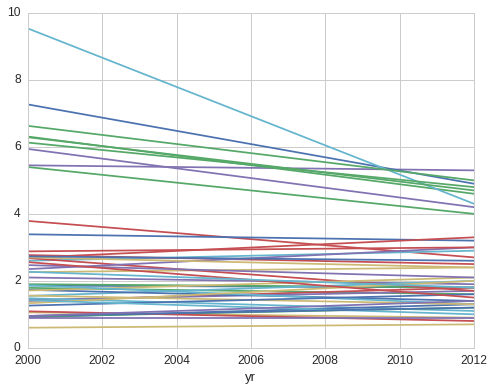

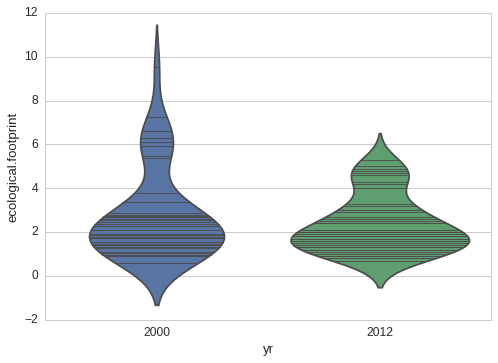

In [8]:
display(Markdown('### Paired Countries Only'))

# Each line will be a country
temp_df = paired.T

temp_df.plot(figsize=(8, 6), legend=False)
graph.show()

# And a violin plot to get a feel for the distribution
temp = data[data.country.isin(temp_df.columns.tolist())]
sns.violinplot(x='yr', y='ecological.footprint', data=temp, inner='sticks')
graph.show()

Hmmm I've lost all hope of this being statistically significant. I mean there are clearly some countries have decreased but most have stayed the same

We can use the _Kolmogorov-Smirnov Test_ as our non parametric 2 sample t-Test subsitute (I think :D ).

In [9]:
ks = ks_2samp(paired[2000], paired[2012])

print('KS =', ks.statistic, 'p-value =', ks.pvalue)

KS = 0.195652173913 p-value = 0.307910557071


# Conclusion

If this is real data then the sad conclusion to draw is that the world as a whole, per country, has not improved... That being said I also expected countries that rank high on this list to be that ones that undergo the most improvement which would be easy enough to check.